# MNIST

MNIST ("Modified National Institute of Standards and Technology") is a core dataset used for training various image processing and machine learning systems. 

It is one of the most well-known and widely used datasets in the field of computer vision. 

MNIST contains a large database of handwritten digits and is often used as an entry point for testing machine learning algorithms.

The MNIST dataset consists of two parts:
- Training set: Contains 60,000 examples. Each example is a 28x28 pixel monochrome image that represents a single handwritten digit from 0 to 9.
- Test Set: Contains 10,000 examples that are used to test learned models. These examples have the same format as those in the training set.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and display data

MNIST is a very well known dataset. It is often compared to Hello world for machine learning.

Therefore, many frameworks have ready-made features to download it.

In [ ]:
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Print the dimensions of each matrix.

In [ ]:
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

The digits are stored in a 28x28 pixel matrix. 

Values are grayscale 0 - 255
* 0 is black, 
* 255 is white

Let's look at the first digit.

In [ ]:
X_train[0]

In [ ]:
img = X_train[0]
print (f"min:{np.amin(X_train[0])} max:{np.amax(X_train[0])}")

Let's write a function that will display the matrices as an image and write a description for them.

In [ ]:
def show_images (images, labels, rows=6, cols=10):
    fig, axes = plt.subplots(rows, cols, figsize=(cols, rows))
    for idx in range (0, rows * cols):
        ridx=idx // cols
        cidx=idx % cols
        ax= axes[ridx, cidx]
        ax.axis("off")
        ax.imshow(images[idx], cmap="gray_r")
        ax.set_title(f"{labels[idx]}")
    plt.show()    

In [ ]:
show_images(X_train, Y_train, 2, 10)

# Data preparation

Standardization of values from range 0 - 255 to range 0 - 1

In [ ]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

The input to the neural network is a vector. 

We have a 28x28 matrix as input. We need to change that to a 784x1 vector.

In [ ]:
print (X_train.shape)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))
print (X_train.shape)

The first digit is no longer a matrix, but a vector.

In [ ]:
X_train[0]

Digit recognition is a classification task where we assign the input data to one of 10 categories.

In the input data we have the correct answer stored as a number from 0 to 9.

For the neural network, we need to modify the results using binary encoding.

For encoding we use a built-in function in the keras framework.

Original result - number 5.

In [ ]:
Y_train[0]

In [ ]:
from keras.utils import to_categorical 
Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

Convert to a vector with all 0s. Only at position 5 will there be a 1.

In [ ]:
Y_train[0]

# Neural network

In [ ]:
import keras
from keras.layers import Dense, Activation, Input
from keras.models import Sequential

Again, we create a sequential model that has 784 values as input.

In [ ]:
model = Sequential()
model.add(Input(shape=(784,))) 

Gradually inc the other hidden dense ridges.
* A dense layer connects each neuron from the previous layer to every neuron in the layer.
* RELU and Softmax activation functions are used. 
* The last Softmax function is used in the output layer because this project is a classification project.

In [ ]:
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(10, activation = 'softmax'))

* Compilation is the last step in creating a model.
* The optimizer we use is Adam. Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to iteratively update the network weights based on the training data.
* Cost function - categorical_crossentropy, a special loss function for classification (https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class).
* Another metric - Accuracy - is computed during learning.

In [ ]:
model.compile(loss = "categorical_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"]
                )

Let's look at the structure of a neural network.

In [ ]:
model.summary()

In [ ]:
from keras_visualizer import visualizer 
visualizer(model, file_format='png', view=True)

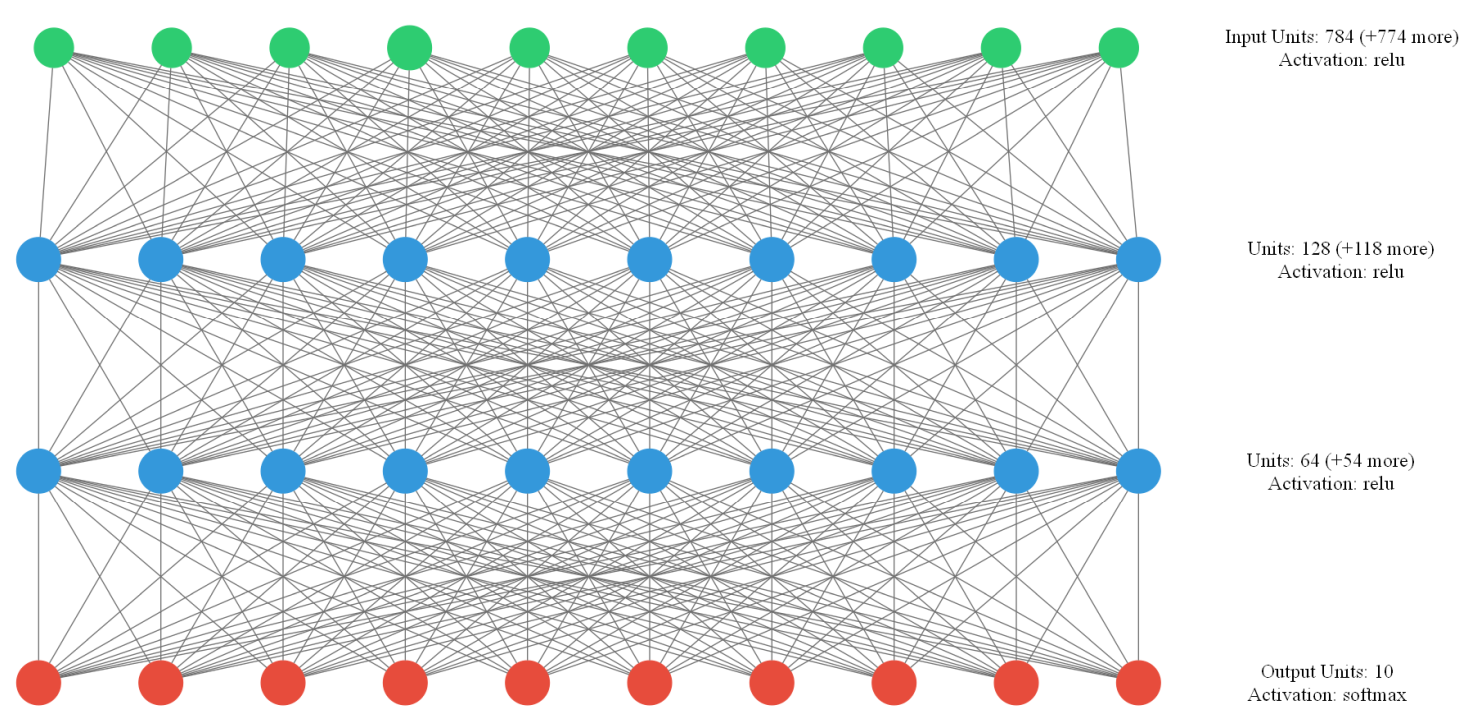

# Learning
- The maximum number of epochs will be 200.
- The batch size is 75. 
- We will stop learning when the accuracy of the model does not increase.

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='accuracy', patience=30)
history=model.fit(X_train, Y_train, epochs=200, batch_size=75, callbacks=[early_stop])

Save the learned model to a file.

In [ ]:
model.save('classification_model_mnist.keras')

# History of learning model
Again, we look at the learning history and check that the value of the cost function decreases with increasing epochs.

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.legend(loc="right")
plt.title('Loss, accuracy')
plt.ylabel('Loss, accuracy')
plt.xlabel('Počet epoch')
plt.show()

# Model Verification
We validate the trained model on test data that the neural network has not seen during learning.

In [ ]:
Y_pred = model.predict(X_test)

The first predicted digit is obtained from the first output vector. 

We look for the position of the maximum value. In our case it is the 7th position.

In [ ]:
Y_pred[0]

We will check the result against reality.

In [ ]:
Y_test[0]

The classification neural network returns a vector of class membership probabilities.

If we want one class as the answer, we usually use the max function.

In [ ]:
import numpy as np
Y_pred_best_answer = np.argmax(Y_pred, axis=-1)
Y_pred_best_answer

Do the same with the test answers (reality).

Ideally, both fields are equal.

In [ ]:
Y_test_best_answer=np.argmax(Y_test, axis=-1)
Y_test_best_answer

The confusion matrix representation is important to verify the correct behavior of the classification neural network.

First, we can find the number of correctly predicted classes on the diagonal.

From the numbers off the diagonal, we can tell what digits the network misrecognizes and what it confuses them for.

If there are multiple wrong predictions, it is good to
* Modify the dataset
* Modify the structure of the neural network
* Change the learning parameters

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf_matrix=confusion_matrix(Y_test_best_answer, Y_pred_best_answer)
sns.heatmap(cf_matrix, annot=True)

There are other values that indicate the quality of the classification neural network
* R2 score
* Accuracy
* Loss function value
* ...

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test_best_answer, Y_pred_best_answer)
print('R2 score: {}'.format(r2))

In [ ]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print (f"Loss function (categorical_crossentropy): {scores[0]}")
print (f"Accuracy: {scores[1]}")

If we want to debug the learning process, it is a good idea to look at what images the network had problems with.

Sometimes we find that we would have a problem with them as well.

The question is whether to keep this input data in the learning dataset.

In [ ]:
def show_wrong_predictions(X_test, Y_test, Y_pred, rows=5, cols=5):    
    """ 
    Zobrazení špatných předpovědí
    První číslice je správná, druhá odhadovaná
    """
    idx = 0
    max_examples = rows * cols
    fig, axes = plt.subplots(rows, cols, figsize=(cols, rows))    
    for i in range(Y_test.shape[0]):    
        if (Y_test[i] != Y_pred[i]):                                    
            ridx=idx // cols
            cidx=idx % cols            
            ax = axes[ridx, cidx]
            ax.axis("off")
            ax.imshow(X_test[i].reshape(28,28), cmap="gray_r")
            ax.set_title(f"{Y_test[i]} != {Y_pred[i]}")            
            idx +=1
            if (idx == max_examples):
                break

In [ ]:
show_wrong_predictions(X_test, Y_test_best_answer, Y_pred_best_answer, 2, 10)

# Using the model
Once we have trained the model, we can present it with any 28x28 matrix.

The current neural network architecture, does not allow it to answer that it "doesn't know" what is in the image.

It will always return a membership in one of the 10 classes.

The "hallucination" of the network can be shown in a random picture.

In [ ]:
img = np.random.rand(1, 784) * 2 -1
plt.imshow(img.reshape(28,28), cmap="gray_r")

In [ ]:
img_reshaped = img.reshape(1, 784)
test_predictions = model.predict([img_reshaped])

In [ ]:
for i in range(10):
    print (f"{i}: {test_predictions[0, i]:.5f}")